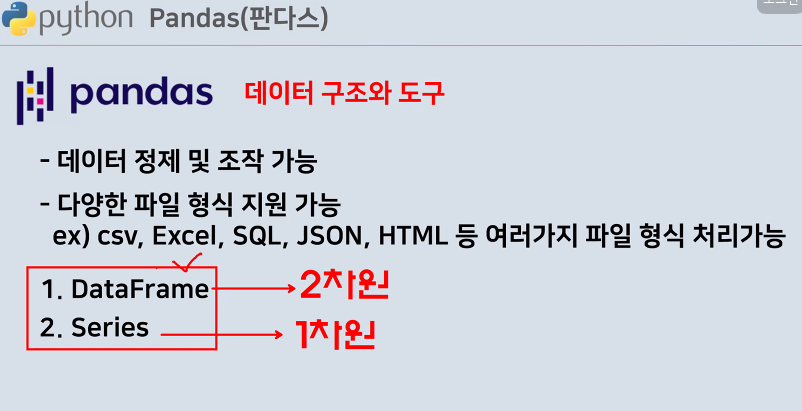

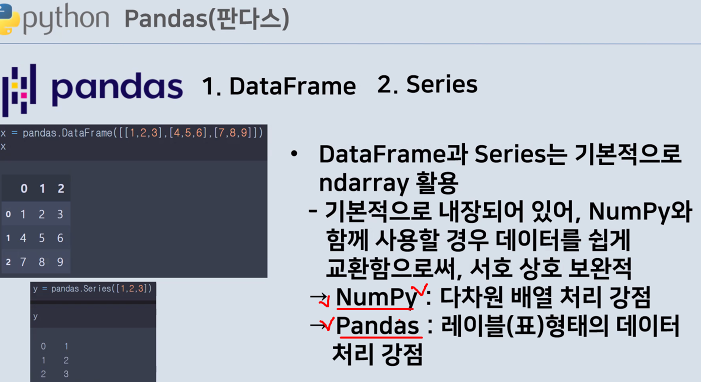

## 1. pandas
- pannel data의 약자
- 1. 다양한 파일 형식 지원 가능 → csv, excel, SQL, JSON 등등
- 2. 데이터 정제 및 조작 특화된 라이브러리
- 3. DataFram과 Series 는 기본적으로 np.array(ndarray)구조
    - numpy 라이브러리 호환

### 1.1 pandas에서 제공하는 데이터 구조
- Series : 1차원 배열 형태의 데이터 구조
    - index + value
- DataFrame : 2차원 배열 형태의 데이터 구조
    - Series들의 모음
    - column(열) + row(행) 구조
    - 서로 다른 자료형을 저장하여 활용할 수 있다.

In [1]:
import numpy as np
import pandas as pd

###  1 . Series 다루기
#### 1.1 Series 생성

In [2]:
# Series 생성
pop = pd.Series([9668465,3391946,2942828,1450062])
print(pop, end = "\n\n")

# index 명 지어주기
# pd.Series([시퀀스 자료구조], index = ['인덱스명1', '인덱스명2'...])
# population 을 줄여서 pop으로 별명 지어줬음..
pop = pd.Series([9668465,3391946,2942828,1450062], index = ['서울','부산','인천','광주'])
print(pop)

0    9668465
1    3391946
2    2942828
3    1450062
dtype: int64

서울    9668465
부산    3391946
인천    2942828
광주    1450062
dtype: int64


In [3]:
# Series 값 확인
print(pop.values, end='\n\n')
print(pop.array)

[9668465 3391946 2942828 1450062]

<PandasArray>
[9668465, 3391946, 2942828, 1450062]
Length: 4, dtype: int64


In [4]:
# Series  index 확인
pop.index

Index(['서울', '부산', '인천', '광주'], dtype='object')

In [5]:
# Series 데이터 타입 확인
print(pop.dtype) # 요소들의 타입 확인
print()
print(type(pop)) # Series 타입 확인

int64

<class 'pandas.core.series.Series'>


In [6]:
# Series 에 이름 지정
# Series 에 큰 타이틀 이름 지정
pop.name = '인구'

# Series 에 index 이름 지정
pop.index.name= '지역'

pop

지역
서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 인구, dtype: int64

In [7]:
# Series 연산
pop / 1000000

지역
서울    9.668465
부산    3.391946
인천    2.942828
광주    1.450062
Name: 인구, dtype: float64

### 1.2 Series 인덱싱, 슬라이싱
- 인덱싱 : 1개의 요소를 가리키는 것
- 슬라이싱 :  여러개의 요소를 잘라내는 것

In [8]:
pop

지역
서울    9668465
부산    3391946
인천    2942828
광주    1450062
Name: 인구, dtype: int64

In [9]:
print(pop[1]) # 정수 인덱싱
print(pop['부산']) # index 별명 인덱싱
print()
print(pop[ [0,3,1] ]) # 다중 인덱싱(정수)
# [0,3,1] 순서대로 인덱싱 해라

print()
print(pop[ ['서울', '광주', '부산']]) # 다중 인덱싱 (index 별명)

3391946
3391946

지역
서울    9668465
광주    1450062
부산    3391946
Name: 인구, dtype: int64

지역
서울    9668465
광주    1450062
부산    3391946
Name: 인구, dtype: int64


### 1.3 'iloc' 와 'loc' 속성
- iloc : (Integer LOCation) 정수 위치 → '행번호'를 가지고 값을 인덱싱 하는 방법
- loc : (LOCation) 위치 → 'index 별명'을 가지고 값을 인덱싱 하는 방법

In [10]:
print(pop.iloc[0]) # iloc 인덱싱
print(pop.iloc[0:2]) # iloc 슬라이싱 # 끝값은 포함X

9668465
지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64


In [11]:
print(pop.loc['서울']) # iloc 인덱싱
print(pop.loc['서울':'부산']) # iloc 슬라이싱 (번호가 아니여서 ~ 끝값 포함)

9668465
지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64


### 1.4 Series Boolean 인덱싱
- 특정 조건을 만족하는 값들의 인덱싱
- Series[boolean mask]

In [12]:
print(pop[0:2])
print(pop['서울':'부산'])

지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64
지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64


In [13]:
print(pop.iloc[0:2])
print(pop.loc['서울':'부산'])

지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64
지역
서울    9668465
부산    3391946
Name: 인구, dtype: int64


In [14]:
pop[pop >= 2500000]

지역
서울    9668465
부산    3391946
인천    2942828
Name: 인구, dtype: int64

## Series Boolean indexing,연산실습
- average monthly wage : 월 평균임금
- average daily wage : 일 평균임금

In [15]:
data = {'IT기획자':8644000, '데이터분석가':7158000,
       '응용SW개발자':6426000, 'IT품질관리자':8294000}

# 딕셔너리 자료형을 Series로 변환
sw_M_wage = pd.Series(data)
sw_M_wage

IT기획자      8644000
데이터분석가     7158000
응용SW개발자    6426000
IT품질관리자    8294000
dtype: int64

In [16]:
data2 = {'IT기획자':9543000, '데이터분석가':11226000,
       '시스템SW개발자':5100000, 'IT마케터':7801000}
sw_M_wage2 = pd.Series(data2)
sw_M_wage2

IT기획자        9543000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [17]:
# 일평균임금 계산
# 실제 계산시 3개월간의 총 임금을 그 기간의 총 일수로 나눠서 산정

sw_D_wage = (sw_M_wage/23).astype(int)
sw_D_wage

IT기획자      375826
데이터분석가     311217
응용SW개발자    279391
IT품질관리자    360608
dtype: int32

In [18]:
# 두 회사의 차이를 비교하기 위해 연산 실행
# Series끼리의 연산(가능하나, inner join으로만 나오게 된다.)
# NaN : 결측치(비어있는 값)

wage_minus = sw_M_wage2 - sw_M_wage
wage_minus

IT기획자        899000.0
IT마케터             NaN
IT품질관리자           NaN
데이터분석가      4068000.0
시스템SW개발자          NaN
응용SW개발자           NaN
dtype: float64

In [19]:
# 비어있지 않는 데이터만 보는 경우
# notnull()

wage_minus[wage_minus.notnull()].astype(int)

IT기획자      899000
데이터분석가    4068000
dtype: int32

In [20]:
# 비어있는 데이터만 보는 경우
# isnull()

wage_minus[wage_minus.isnull()]

IT마케터      NaN
IT품질관리자    NaN
시스템SW개발자   NaN
응용SW개발자    NaN
dtype: float64

### Series 데이터 추가, 수정, 삭제

In [21]:
# 수정
print(sw_M_wage2)

IT기획자        9543000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64


In [22]:
sw_M_wage2['IT기획자'] = 97420000
sw_M_wage2

IT기획자       97420000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
dtype: int64

In [23]:
# 추가
sw_M_wage2['IT컨설턴트'] = 9805000
sw_M_wage2

IT기획자       97420000
데이터분석가      11226000
시스템SW개발자     5100000
IT마케터        7801000
IT컨설턴트       9805000
dtype: int64

In [24]:
# 삭제
del sw_M_wage2['시스템SW개발자']

In [25]:
sw_M_wage2

IT기획자     97420000
데이터분석가    11226000
IT마케터      7801000
IT컨설턴트     9805000
dtype: int64

## 2.DataFrame
- 2차원 데이터에서 사용되는 자료구조
- excel, CSV, DB, API 등등 불러오되, 다시 재구성해야 함

In [26]:
# 첫번쨰 방법 : 딕셔너리를 통한 컬럼 단위로 생성

data = {'ITPM':[463,9543,57],
        '업무분석가':[544,11226,68],
       'IT아키텍트':[518,10672,64],
       'UIUX개발자':[291,6003,36]}
data

{'ITPM': [463, 9543, 57],
 '업무분석가': [544, 11226, 68],
 'IT아키텍트': [518, 10672, 64],
 'UIUX개발자': [291, 6003, 36]}

In [27]:
# DataFrame화
df = pd.DataFrame(data)
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
0,463,544,518,291
1,9543,11226,10672,6003
2,57,68,64,36


In [28]:
# DataFrame화
df = pd.DataFrame(data)
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
0,463,544,518,291
1,9543,11226,10672,6003
2,57,68,64,36


In [29]:
# Data Frame화
df1 = pd.DataFrame(data, index = ['일 평균임금', '월 평균임금', '시간 평균임금'])
df1

,ITPM,업무분석가,IT아키텍트,UIUX개발자
일 평균임금,463,544,518,291
월 평균임금,9543,11226,10672,6003
시간 평균임금,57,68,64,36


In [30]:
# 두번째 방법 : row단위로 list 활용

data2 = [[463,9543,57],
         [544,11226,68],
         [518,10672,64],
         [291,6003,36]]

columns = ['일 평균임금', '월 평균임금', '시간 평균임금']
row = ['ITPM', '업무분석가', 'IT아키텍트', 'UXUI개발자']
df2 = pd.DataFrame(data2, index=row, columns = columns)
df2

,일 평균임금,월 평균임금,시간 평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UXUI개발자,291,6003,36


In [31]:
# index와 columns의 전치(위치를 바꿈)
# Transpose의 약자 >> T
df2 = df2.T
df2

,ITPM,업무분석가,IT아키텍트,UXUI개발자
일 평균임금,463,544,518,291
월 평균임금,9543,11226,10672,6003
시간 평균임금,57,68,64,36


In [32]:
df2.values

array([[  463,   544,   518,   291],
       [ 9543, 11226, 10672,  6003],
       [   57,    68,    64,    36]], dtype=int64)

In [33]:
df.index

RangeIndex(start=0, stop=3, step=1)

In [34]:
df.columns

Index(['ITPM', '업무분석가', 'IT아키텍트', 'UIUX개발자'], dtype='object')

## DataFrame indexing/slicing
- DataFrame은 'Series의 모임'이라고 생각하면 편함
- DataFrame 인덱싱 : 하나의 Series를 가져옴
- DataFrame 슬라이싱 : 여러개의 원하는 부분을 가져옴

#### 열접근(컬럼선택)
- DataFrame명.['컬럼명']

In [35]:
# Series >> 1차원
df2['ITPM']

일 평균임금      463
월 평균임금     9543
시간 평균임금      57
Name: ITPM, dtype: int64

In [36]:
# Series >> 2차원
df2[['ITPM', '업무분석가']]

,ITPM,업무분석가
일 평균임금,463,544
월 평균임금,9543,11226
시간 평균임금,57,68


In [37]:
# DataFrame 추가
df2['정보보안전문가'] = [362, 7426, 45]
df2

,ITPM,업무분석가,IT아키텍트,UXUI개발자,정보보안전문가
일 평균임금,463,544,518,291,362
월 평균임금,9543,11226,10672,6003,7426
시간 평균임금,57,68,64,36,45


In [38]:
# 행 슬라이싱
df2[0:2]

,ITPM,업무분석가,IT아키텍트,UXUI개발자,정보보안전문가
일 평균임금,463,544,518,291,362
월 평균임금,9543,11226,10672,6003,7426


## DataFrame 슬라이싱 >> 인덱서(indexer)활용
- 인덱서란?
    - DataFrame 객체에 대해서 "함수"가 아닌 "속성[ ]"으로써, 
      행과 열을 한번에 인덱싱/슬라이싱 할 수 있는 기능
<br><br>      
- loc[ ] indexer
    - "인덱스명"과 "컬럼명"을 가지고 값을 인덱싱/슬라이싱하는 방법<br>
    - DataFrame명.loc["인덱스명"{,"컬럼명"}]
    - "컬럼명" 생략 시 해당 행의 모든 열을 출력
<br><br>

- iloc[ ] indexer
    - "행 번호"와 "열 번호"를 가지고 값을 인덱싱/슬라이싱 하는 방법<br>
    - DataFrame명.loc["행 번호"{,"열 번호"}]
    - "열 번호" 생략 시 해당 행의 모든 열을 출력

In [39]:
df2

,ITPM,업무분석가,IT아키텍트,UXUI개발자,정보보안전문가
일 평균임금,463,544,518,291,362
월 평균임금,9543,11226,10672,6003,7426
시간 평균임금,57,68,64,36,45


In [40]:
display(df2.loc[['시간 평균임금']])
display(df2.iloc[[2]])

,ITPM,업무분석가,IT아키텍트,UXUI개발자,정보보안전문가
시간 평균임금,57,68,64,36,45


,ITPM,업무분석가,IT아키텍트,UXUI개발자,정보보안전문가
시간 평균임금,57,68,64,36,45


In [41]:
display(df2.loc['시간 평균임금', 'ITPM'])
display(df2.iloc[2,0])

57

57

In [42]:
display(df2.iloc[0:2,2:4])

,IT아키텍트,UXUI개발자
일 평균임금,518,291
월 평균임금,10672,6003


In [43]:
df

,ITPM,업무분석가,IT아키텍트,UIUX개발자
0,463,544,518,291
1,9543,11226,10672,6003
2,57,68,64,36


In [44]:
df2

,ITPM,업무분석가,IT아키텍트,UXUI개발자,정보보안전문가
일 평균임금,463,544,518,291,362
월 평균임금,9543,11226,10672,6003,7426
시간 평균임금,57,68,64,36,45


In [45]:
# 인덱서를 활용하여 슬라이싱
# DataFrame명.인덱서[행시작 : 행끝 , {열시작 : 열끝} ]  -> {열}은 생략가능

# loc -> 끝값 포함 (숫자가 아니여서)
display(df2.loc['일 평균임금' : '시간 평균임금' , '업무분석가' : '정보보안전문가'])

# iloc -> 끝값 미포함
display(df2.iloc[1:2 , 2:4])

,업무분석가,IT아키텍트,UXUI개발자,정보보안전문가
일 평균임금,544,518,291,362
월 평균임금,11226,10672,6003,7426
시간 평균임금,68,64,36,45


,IT아키텍트,UXUI개발자
월 평균임금,10672,6003


In [46]:
# 멀티 row, 멀티 column 접근
# 인덱스값을 list로 보내준다!!!!!!!! → " [  ] "를 한번 더 써야함
# ex [ [1,2,3] ]

display(df2.loc[ ['일 평균임금' , '시간 평균임금']  ])

display(df2.loc [ ['일 평균임금', '시간 평균임금'] , ['ITPM', '정보보안전문가'] ])

display(df2.iloc [ [0,2] , [0,4] ])

,ITPM,업무분석가,IT아키텍트,UXUI개발자,정보보안전문가
일 평균임금,463,544,518,291,362
시간 평균임금,57,68,64,36,45


,ITPM,정보보안전문가
일 평균임금,463,362
시간 평균임금,57,45


,ITPM,정보보안전문가
일 평균임금,463,362
시간 평균임금,57,45


## 2.3 DataFrame Boolean 인덱싱
- boolean mask 활용 → '필터'의 개념 (조건을 주면서 True인 값들만 뽑아오는 방식)

In [47]:
# 일 평균임금이 400이상인 전체 데이터 추출
display(df2)

,ITPM,업무분석가,IT아키텍트,UXUI개발자,정보보안전문가
일 평균임금,463,544,518,291,362
월 평균임금,9543,11226,10672,6003,7426
시간 평균임금,57,68,64,36,45


In [48]:
df2.T

,일 평균임금,월 평균임금,시간 평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UXUI개발자,291,6003,36
정보보안전문가,362,7426,45


In [49]:
df=df2.T
df

,일 평균임금,월 평균임금,시간 평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UXUI개발자,291,6003,36
정보보안전문가,362,7426,45


In [50]:
# Boolean mask
mask = df.loc[ : , '일 평균임금' ] >=400
mask

ITPM        True
업무분석가       True
IT아키텍트      True
UXUI개발자    False
정보보안전문가    False
Name: 일 평균임금, dtype: bool

In [51]:
df[ mask ]

,일 평균임금,월 평균임금,시간 평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64


In [52]:
# 혹은
df.loc[ : , '일 평균임금' ] >=400
df[ df.loc[ : , '일 평균임금' ] >=400 ]

#주의 ) df.loc['일 평균임금'] -> 이렇게 작성하면 행 값 데이터가 없어서 오류

,일 평균임금,월 평균임금,시간 평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64


In [53]:
# 혹은
#df [ mask ] 의 느낌임!!!!
# mask -> 조건에 해당하는 값만 True로 반환된 리스트 형태!!!!!!!
df[df['일 평균임금'] >= 400]

,일 평균임금,월 평균임금,시간 평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64


In [54]:
df.loc['ITPM']

일 평균임금      463
월 평균임금     9543
시간 평균임금      57
Name: ITPM, dtype: int64

In [55]:
# 실습
#직업이 업무분석가와 정보보안전문가만 슬라이싱 한 이후,
display(df)

df_a=df.loc[ ['업무분석가','정보보안전문가'] , : ] # 멀티 인덱싱!!!!!!!! [ a , b , c] 형태로 넣어준다
display(df_a)

# 시간 평균임금이 50이상인 직업을 Boolean index 하자!
mask = df_a.loc[ : , '시간 평균임금' ] >=50
# mask = df_a['시간 평균임금'] >= 50  → '일 평균임금 463 544 ...' 이 하나하나의 Series임!!!!!!!
# df_a 에서 '시간 평균임금'의 Series 를 뽑아와라 라는 느낌!!!!!!!
# df_a ['ITPM'] 은 안됨 Series를 뽑아와야함!!!!!!
display(mask)

display(df_a[mask])

,일 평균임금,월 평균임금,시간 평균임금
ITPM,463,9543,57
업무분석가,544,11226,68
IT아키텍트,518,10672,64
UXUI개발자,291,6003,36
정보보안전문가,362,7426,45


,일 평균임금,월 평균임금,시간 평균임금
업무분석가,544,11226,68
정보보안전문가,362,7426,45


업무분석가       True
정보보안전문가    False
Name: 시간 평균임금, dtype: bool

,일 평균임금,월 평균임금,시간 평균임금
업무분석가,544,11226,68


### population 실습 - 값의 카운팅(해당값이 몇개?), 정렬(오름/내림차순)
- pandas.read_csv('경로&파일명.확장자'{, encoding = '방식' , index_col = '컬럼명'})
- {속성} 은 생략가능
- encoding 방식(한글로 불러오는 방법 3가지) ( 인코딩안하면 깨져서 출력될 수 있음 )
    -  euc-kr, utf-8, cp949
- index_col : 해당 '컬럼명'을 index로 사용하는 속성 
    - 여기서 '컬럼명'은 기존에 있는 컬럼명들 중에 골라야함

In [56]:
pd.read_csv('./data/population.csv')
# encoding = > '한글로 번역해준다...'

,도시,지역,2020,2015,2010,2005
0,서울,수도권,9668465,10022181.0,10312545.0,10167344
1,부산,경상권,3391946,NaN,NaN,3628293
2,인천,수도권,2942828,2925815.0,NaN,2600495
3,광주,전라권,1450062,1474636.0,1454636.0,1401745
4,대구,경상권,2418436,2466052.0,2431774.0,2456016


In [57]:
pd.read_csv('./data/population.csv', encoding ='utf-8', index_col='도시')


,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


In [58]:
pd.read_csv('./data/population.csv', encoding ='utf-8', index_col = '도시')

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


In [59]:
pd.read_csv('./data/population.csv', encoding ='utf-8', index_col = '지역').loc['수도권']

,도시,2020,2015,2010,2005
지역,,,,,
수도권,서울,9668465,10022181.0,10312545.0,10167344
수도권,인천,2942828,2925815.0,NaN,2600495


In [60]:
pd.read_csv('./data/population.csv', encoding ='utf-8', index_col = '지역').iloc[[0] , : ]

,도시,2020,2015,2010,2005
지역,,,,,
수도권,서울,9668465,10022181.0,10312545.0,10167344


In [61]:
pd.read_csv('./data/population.csv', encoding ='utf-8', index_col = '지역').iloc[[0]]

,도시,2020,2015,2010,2005
지역,,,,,
수도권,서울,9668465,10022181.0,10312545.0,10167344


In [62]:
pop = pd.read_csv('./data/population.csv', encoding ='utf-8', index_col = '도시')
pop

,지역,2020,2015,2010,2005
도시,,,,,
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016


In [63]:
# value_counts() : 각각의 값이 나온 횟수를 세어주는 기능
# 같은 값이 몇개? ( 1개 -> 중복 없음 )
pop['2020'].value_counts()

9668465    1
3391946    1
2942828    1
1450062    1
2418436    1
Name: 2020, dtype: int64

In [64]:
# 결측치(NaN) 은 count 되지 않는다!
pop['2010'].value_counts()
# pop -> DataFrame
# pop['2010'] -> Series

10312545.0    1
1454636.0     1
2431774.0     1
Name: 2010, dtype: int64

In [65]:
# sort_index() -> index 기준으로 정렬( 기준 : 오름차순 (ascending = True)생략되어있음 )
pop.sort_index()

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
서울,수도권,9668465,10022181.0,10312545.0,10167344
인천,수도권,2942828,2925815.0,NaN,2600495


In [66]:
# ascending (오름차순) 을 False  -> 내림차순
pop.sort_index(ascending = False)

,지역,2020,2015,2010,2005
도시,,,,,
인천,수도권,2942828,2925815.0,NaN,2600495
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
대구,경상권,2418436,2466052.0,2431774.0,2456016
광주,전라권,1450062,1474636.0,1454636.0,1401745


In [67]:
# 1. 열접근을 통해서 정렬하는 방법 → Series 
# sort_values() : 데이터 값을 기준으로 정렬 -> 열 접근 
# NaN은 ascending에 상관없이 항상 마지막에 위치
pop['2015'].sort_values(ascending=False)

도시
서울    10022181.0
인천     2925815.0
대구     2466052.0
광주     1474636.0
부산           NaN
Name: 2015, dtype: float64

In [68]:
# sort_values(정렬할 값)

In [69]:
# 2, DataFrame 에서 기준을 정해서 정렬하는 방법

pop.sort_values(by = '2010')

,지역,2020,2015,2010,2005
도시,,,,,
광주,전라권,1450062,1474636.0,1454636.0,1401745
대구,경상권,2418436,2466052.0,2431774.0,2456016
서울,수도권,9668465,10022181.0,10312545.0,10167344
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495


In [70]:
# 이중 정렬
# by = ['컬럼명1', '컬럼명2', .....] → 컬럼명1  정렬 이후 컬럼명2 정렬
pop.sort_values(by=['지역','2015'])
# 지역명 을 오름차순으로 정렬 후, 2015 기준으로 오름차순 정렬됨

,지역,2020,2015,2010,2005
도시,,,,,
대구,경상권,2418436,2466052.0,2431774.0,2456016
부산,경상권,3391946,NaN,NaN,3628293
인천,수도권,2942828,2925815.0,NaN,2600495
서울,수도권,9668465,10022181.0,10312545.0,10167344
광주,전라권,1450062,1474636.0,1454636.0,1401745


## 3. score 실습 - DataFrame 정렬 복습 및 연산 실습

In [71]:
score = pd.read_csv('./data/score.csv', encoding='euc-kr', index_col='과목')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


## axis = 0, axis = 1
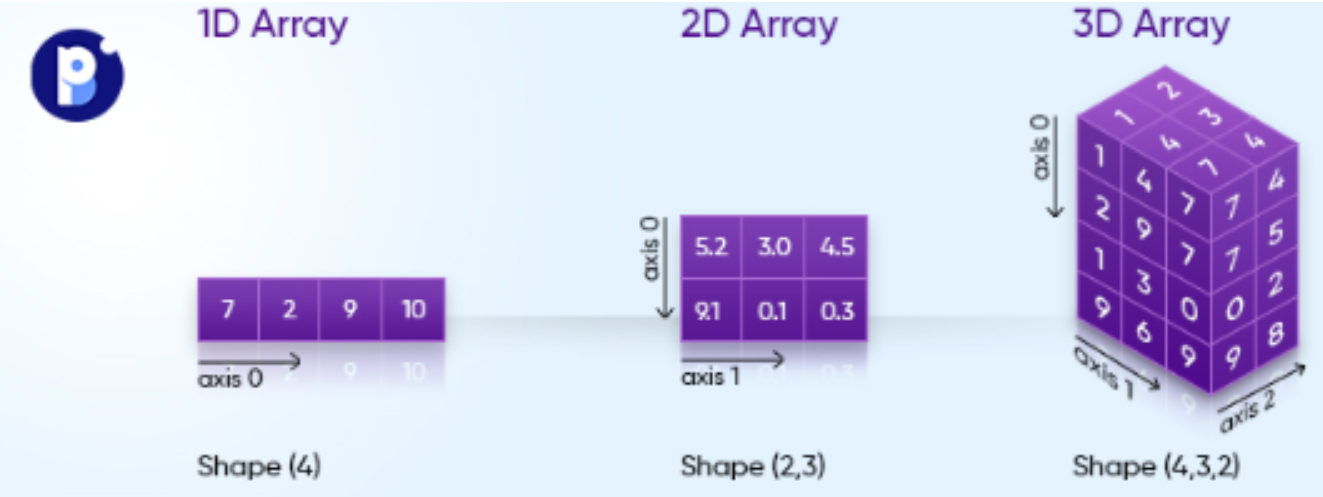
- axis : 축의 "방향"!! 을 뜻함 ( "axis =0(행들이 있는 방향)"  과 "axis = 1(열들이 있는 방향)" )
- axis = 0 → 위 아래로! , axis = 1 → 양 옆으로!
- 기본값 : axis = 0 ( axis 를 생략하면 위 아래 가 기본값 )

In [72]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [73]:
# sum() : 합계
# axis : 축의 방향을 설정하는 속성

# axis = 0 : 기본값, 위아래 연산(행방향)

score.sum(axis=0)
# 위 아래로 sum 

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [74]:
display(score)
score.sum(axis = 1)
# 양 옆으로 sum

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


과목
파이썬    201
DB     282
자바     253
크롤링    298
Web    163
dtype: int64

In [75]:
# 새로운 컬럼 추가
score['5반'] = [90,85,88,93,99]
score

,1반,2반,3반,4반,5반
과목,,,,,
파이썬,45,44,73,39,90
DB,76,92,45,69,85
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99


In [76]:
# 2반을 기준으로 내림차순 → ascending = False
score.sort_values(by = '2반', ascending = False)

,1반,2반,3반,4반,5반
과목,,,,,
DB,76,92,45,69,85
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99
파이썬,45,44,73,39,90


In [77]:
# drop() → '행'을 삭제하는 기능
score.drop('DB') # 이거만 하게되면 다시 score 를 확인해보면 DB가 살아있음

,1반,2반,3반,4반,5반
과목,,,,,
파이썬,45,44,73,39,90
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99


In [78]:
score

,1반,2반,3반,4반,5반
과목,,,,,
파이썬,45,44,73,39,90
DB,76,92,45,69,85
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99


In [79]:
# drop() → '행'을 삭제하는 기능
# inplace = False → 기본값
score.drop('DB', inplace = False)

,1반,2반,3반,4반,5반
과목,,,,,
파이썬,45,44,73,39,90
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99


In [80]:
score

,1반,2반,3반,4반,5반
과목,,,,,
파이썬,45,44,73,39,90
DB,76,92,45,69,85
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99


In [81]:
# inplace = False → 기본값  : False는 즉시 적용 안됨!
# 따라서 inplace = False 로 한번 잘 지워졌나 확인 후
# inplace = True 로 확정 한다!

In [82]:
score.drop('DB', inplace = True)
display(score)

,1반,2반,3반,4반,5반
과목,,,,,
파이썬,45,44,73,39,90
자바,47,92,45,69,88
크롤링,92,81,85,40,93
Web,11,79,47,26,99


In [83]:
# del 객체 → "열"을 삭제
# inplace 없이 바로 반영!

del score['5반']

In [84]:
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [85]:
# 다시 불러오기
score = pd.read_csv('./data/score.csv', encoding='cp949', index_col='과목')
score

,1반,2반,3반,4반
과목,,,,
파이썬,45,44,73,39
DB,76,92,45,69
자바,47,92,45,69
크롤링,92,81,85,40
Web,11,79,47,26


In [86]:
# 실습
# 과목별 합계를 구하여 '합계' 컬럼을 생성

score['합계'] = score.sum(axis = 1)
# 문제점 -> 계속 실행될때마다 합계가 누적됨
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [87]:
del score ['합계']

In [88]:
# 실습
# 과목별 합계를 구하여 '합계' 컬럼을 생성
# 합계가 맞지만, 연속 실행 시키니 누적이 된다 -> 주소값 참조가 이루어지고있어서 누적이됨

#"합계" 열 이 이미 존재 하는 경우
# 기존 "합계" 컬럼도 함께 다음 "합계 " 계산에 포함되어 

In [89]:
# 누적을 피하기 위해서는 슬라이싱을 해줘야 한다..!
# 정확한 슬라이싱 범위를 지정해서 누적을 피할 수 있음..!

score['합계'] = score.loc[ : , : '4반' ].sum(axis = 1)
# 나는 1반~4반까지의 데이터만 가지고  ( 열의 끝값에 "합계"가 추가되어버림)
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163


In [90]:
# 정확한 슬라이싱 범위를 지정안하면 → [1반 + 2반 + 3반 +4반 + 합계]  = 합계
# 로 되어서 
# 예를 들어

# 첫번째 실행
# 1반 2반 3반 4반 합계
# 1     1    1    1     4

# 2번째 실행
# 1반 2반 3반 4반 합계
#   1    1   1   1    (1+1+1+1+4)



# 정확한 슬라이싱 범위 지정 하게 되면 → [1반 + 2반 + 3반 +4반 ]  = 합계

# 첫번째 실행
# 1반 2반 3반 4반 합계
# 1     1    1    1     (1+1+1+1)

# 2번째 실행
# 1반 2반 3반 4반 합계
#   1    1   1   1    (1+1+1+1)


In [91]:
# 반 평균 구해보기
# .mean() -> 평균구하기
# score['A'] -> 기본적으로 "열"접근 ( 하나의 Series에 접근)
# score.loc['A'] -> "행"에 접근 = score.loc['A' , : ]  (뒤에 열값은 생략가능)
# score.loc[ , 'A'] -> "열"에 접근 = score.loc[ : , 'A']
score.loc['반평균'] = score.loc[ : 'Web' , : ].mean(axis=0)
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45.0,44.0,73.0,39.0,201.0
DB,76.0,92.0,45.0,69.0,282.0
자바,47.0,92.0,45.0,69.0,253.0
크롤링,92.0,81.0,85.0,40.0,298.0
Web,11.0,79.0,47.0,26.0,163.0
반평균,54.2,77.6,59.0,48.6,239.4


In [92]:
# 소수점 안나오게 int 형으로 바꾸기
score = score.astype(int)
score

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163
반평균,54,77,59,48,239


### .apply() 함수
- pandas 객체 (Series, DataFrame) 에 '열' 혹은 '행'에 대해 함수를 적용하게 해주는 메소드
- pandas 라이브러리에 다른 라이브러리의 함수를 적용하는 방법
    - numpy의 라이브러리 엮을 때 사용

In [93]:
data = {
    'Name': ['John', 'Anna', 'Peter', 'Linda'],
    'Email': ['john@gmail.com', 'anna@yahoo.com', 'peter@gmail.com', 'linda@outlook.com']
}

df = pd.DataFrame(data)
df

,Name,Email
0,John,john@gmail.com
1,Anna,anna@yahoo.com
2,Peter,peter@gmail.com
3,Linda,linda@outlook.com


In [94]:
# 각 Email 부분에서 도메인을 추출
# '@' 기호 기준으로 도메인 주소를 분할

# 함수 정의  → def
def extract_domain(email) :
    return email.split('@')[1]

In [95]:
df['Domain'] = df['Email'].apply(extract_domain)
# 'Email'열 에 접근해서 하나하나의 열에 각각 함수를 적용시키겠다
df

,Name,Email,Domain
0,John,john@gmail.com,gmail.com
1,Anna,anna@yahoo.com,yahoo.com
2,Peter,peter@gmail.com,gmail.com
3,Linda,linda@outlook.com,outlook.com


In [96]:
def plus(num) :
    return num +10

In [97]:
# applymap() → "요소"전체에 대해 접근해서 함수를 적용시키는 메소드
display(score)
display(score.applymap(plus))

,1반,2반,3반,4반,합계
과목,,,,,
파이썬,45,44,73,39,201
DB,76,92,45,69,282
자바,47,92,45,69,253
크롤링,92,81,85,40,298
Web,11,79,47,26,163
반평균,54,77,59,48,239


,1반,2반,3반,4반,합계
과목,,,,,
파이썬,55,54,83,49,211
DB,86,102,55,79,292
자바,57,102,55,79,263
크롤링,102,91,95,50,308
Web,21,89,57,36,173
반평균,64,87,69,58,249


## 4. 데이터 병합

### 4.1 merge() 함수 → "병합"이라는 뜻
- 두 개의 pandas 객체를 합칠 때 특정 "컬럼"의 값을 기준으로 합치는 함수
- pd.merge(left, right, on ="컬럼명" , how ="inner")
- on → 기준이 될 컬럼
- how → join 방식 지정
    - inner(기본값), outer

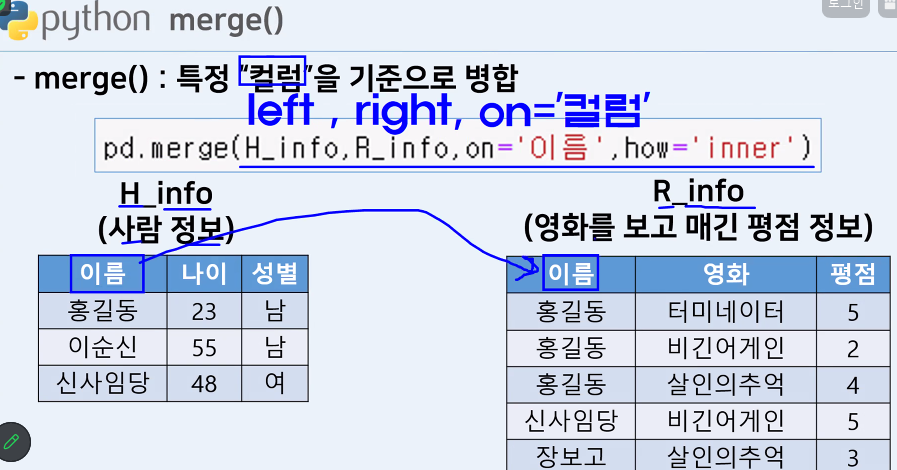

### 위 병합의 결과
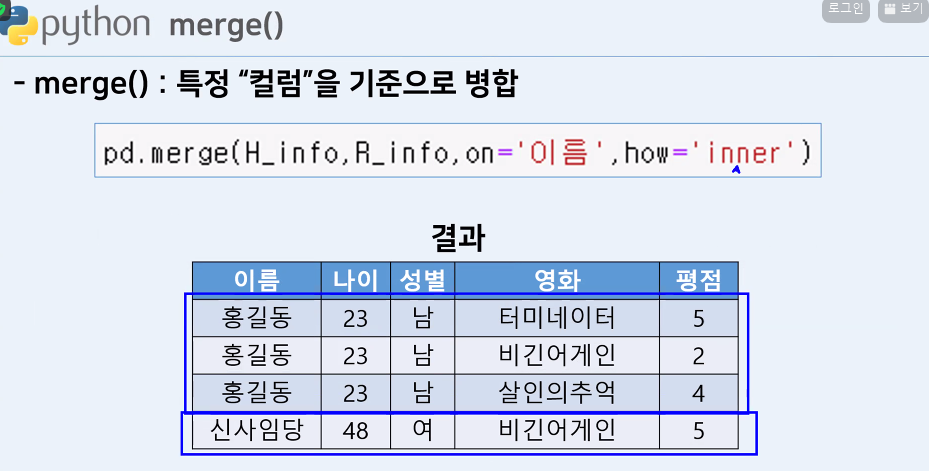

In [99]:
data1 = {
    '이름': ['홍길동','이순신','신사임당'],
    '나이': ['23','55','48'],
    '성별':['남','남','여']
}

data2 = {
    '이름': ['홍길동','홍길동','홍길동','신사임당','장보고'],
    '영화': ['터미네이터','비긴어게인','살인의추억','비긴어게인','살인의추억'],
    '평점':['5','2','4','5','3']
}

In [100]:
H_info = pd.DataFrame(data1)
H_info

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남
2,신사임당,48,여


In [101]:
R_info = pd.DataFrame(data2)
R_info

,이름,영화,평점
0,홍길동,터미네이터,5
1,홍길동,비긴어게인,2
2,홍길동,살인의추억,4
3,신사임당,비긴어게인,5
4,장보고,살인의추억,3


In [102]:
pd.merge(H_info, R_info, on ='이름', how = 'inner')

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,신사임당,48,여,비긴어게인,5


In [103]:
#how = 'inner', 'left', 'right', 'outer' :  총 4가지

# left = inner + 왼쪽테이블
pd.merge(H_info, R_info, on ='이름', how = 'left')

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,이순신,55,남,NaN,NaN
4,신사임당,48,여,비긴어게인,5


In [104]:
# outer  = inner + 왼쪽테이블 + 오른쪽 테이블
pd.merge(H_info, R_info, on ='이름', how = 'outer')

,이름,나이,성별,영화,평점
0,홍길동,23,남,터미네이터,5
1,홍길동,23,남,비긴어게인,2
2,홍길동,23,남,살인의추억,4
3,이순신,55,남,NaN,NaN
4,신사임당,48,여,비긴어게인,5
5,장보고,NaN,NaN,살인의추억,3


### 4.2 concat() 함수 → '이어붙이다' 라는 뜻
- '축(axis)' 을 기준으로 병합
- Series 나 DataFrame을 "축의 방향(axis = 0,1)" 을 설정하여 병합처리

- pd.concat([df1, df2....] ,axis = 0, join = 'outer', Ignore_index = False)
- axis = 0 → 병합할 축의 방향 설정
     - axis = 0 (기본값)
- join = '방식' → merge() 함수에서 how 속성과 유사한 방식
    - inner, outer(기본값)
- ignore_index = True → 인덱스를 새로 부여

In [106]:
data3 = {
        '이름' : ['홍길동', '이순신'],
        '나이' : ['23' , '55'],
        '성별' : ['남','남']
}

data4 = {
        '이름' : ['신사임당', '장보고'],
        '나이' : ['48', '22'],
        '성별' : ['여', '남']
}

In [107]:
df1 = pd.DataFrame(data3)
df1

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남


In [109]:
df2 = pd.DataFrame(data4)
df2

,이름,나이,성별
0,신사임당,48,여
1,장보고,22,남


In [110]:
# 주로 똑같은 컬럼(형태)의 다른 테이블을 하나의 테이블로 합치고자 할 떄 활용
pd.concat([df1,df2], axis = 0) # 그냥 아래로 쭉 이어보겠다

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남
0,신사임당,48,여
1,장보고,22,남


In [111]:
# ignore_index = True → 인덱스를 새로 부여
pd.concat([df1,df2], axis = 0, ignore_index = True)

,이름,나이,성별
0,홍길동,23,남
1,이순신,55,남
2,신사임당,48,여
3,장보고,22,남


In [113]:
data5 = {
        '나이' : ['23','55','48'],
        '성별' : ['남', '남', '여']
}
data6 = {
        '주소' : ['서울', '경기'],
        '학년' : ['3', '1']
}

In [118]:
df3 = pd.DataFrame(data5 , index = ['홍길동', '이순신', '신사임당'])
df4 = pd.DataFrame(data6 , index = ['홍길동','신사임당'])

In [120]:
df3

,나이,성별
홍길동,23,남
이순신,55,남
신사임당,48,여


In [121]:
df4

,주소,학년
홍길동,서울,3
신사임당,경기,1


In [117]:
# 컬럼이 다른 경우 axis = 1(양 옆) 을 추천
pd.concat([df3,df4], axis = 1) # 옆으로 이어보겠다.


,나이,성별,주소,학년
홍길동,23,남,서울,3
이순신,55,남,NaN,NaN
신사임당,48,여,경기,1


In [124]:
# fillna(채울값) : 결측치를 채우는 함수

# 아래 내용은 한번 보고만 가도됨
# MySQL에서는 csv를 DB로 insert 할 수 있는데,
# 진짜 'NaN'값(비어있는 값)이 존재하는 경우 insert 작업 시 error
# 'null' 이라고 존재하는 경우 insert 작업 시 비어있는 값

pd.concat([df3,df4], axis = 1). fillna('값 없음')

,나이,성별,주소,학년
홍길동,23,남,서울,3
이순신,55,남,값 없음,값 없음
신사임당,48,여,경기,1
